<a href="https://colab.research.google.com/github/kzeynep/Python_Atil_hoca/blob/main/KNNClassifierAndRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('12-health_risk_classification.csv')

In [3]:
df.head()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
0,0.564223,0.652825,1.262925,1
1,-1.692569,2.981229,-0.180331,1
2,0.770383,0.400475,1.365806,1
3,2.135007,0.150832,3.084596,0
4,0.360342,1.026132,1.251574,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bmi_score                 1000 non-null   float64
 1   blood_pressure_variation  1000 non-null   float64
 2   activity_level_index      1000 non-null   float64
 3   high_risk_flag            1000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


In [5]:
df.describe()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.023702,0.016769,-0.020771,0.498000
std,1.203694,1.268761,1.392738,0.500246
min,-4.743951,-2.587178,-4.999018,0.000000
25%,-0.796655,-0.981320,-1.057938,0.000000
50%,0.142105,-0.317137,0.204506,0.000000
75%,0.956225,1.017388,1.061181,1.000000
max,2.321480,3.954873,3.477210,1.000000


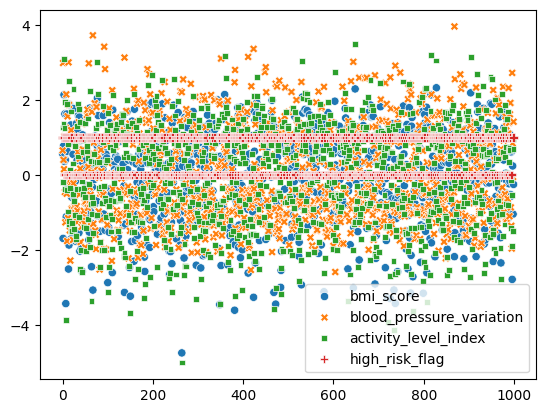

In [6]:
sns.scatterplot(df)
plt.show()

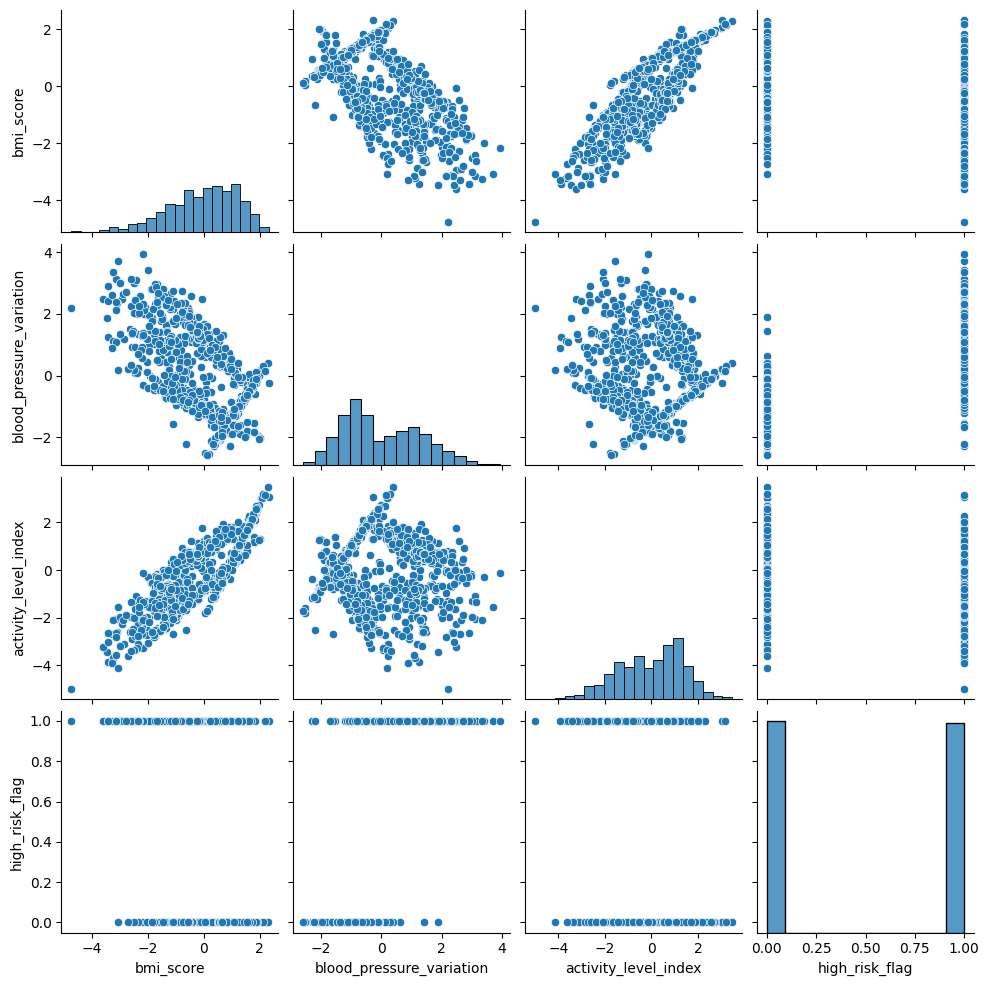

In [7]:
sns.pairplot(df)
plt.show()

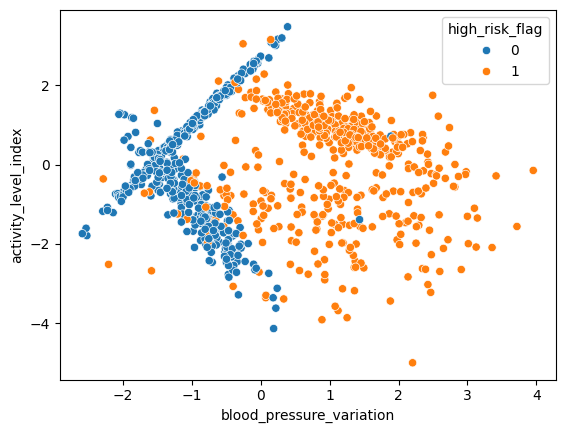

In [8]:
sns.scatterplot( x=df["blood_pressure_variation"], y=df["activity_level_index"], hue=df["high_risk_flag"])
plt.show()

In [9]:
df["high_risk_flag"].value_counts()

,count
high_risk_flag,
0,502
1,498


In [10]:
X = df.drop("high_risk_flag", axis=1)
y = df["high_risk_flag"]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

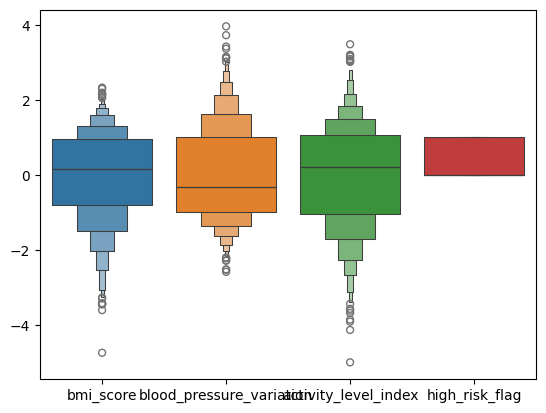

In [12]:
sns.boxenplot(df)
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
classifier = KNeighborsClassifier(n_neighbors=5,algorithm='auto',weights='uniform')

In [16]:
classifier.fit(X_train_scaler, y_train)

KNeighborsClassifier()

In [17]:
y_pred = classifier.predict(X_test_scaler)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[103   0]
 [  9  88]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       103
           1       1.00      0.91      0.95        97

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200

0.955


In [20]:
classifier = KNeighborsClassifier(n_neighbors=5,algorithm='kd_tree',weights='uniform')
classifier.fit(X_train_scaler, y_train)

KNeighborsClassifier(algorithm='kd_tree')

In [21]:
y_pred = classifier.predict(X_test_scaler)

In [22]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[103   0]
 [  9  88]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       103
           1       1.00      0.91      0.95        97

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200

0.955


In [23]:
classifier = KNeighborsClassifier(n_neighbors=3,algorithm='auto',weights='uniform')
classifier.fit(X_train_scaler, y_train)
y_pred = classifier.predict(X_test_scaler)

In [24]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[102   1]
 [  9  88]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       103
           1       0.99      0.91      0.95        97

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

0.95


In [25]:
df_reg = pd.read_csv('12-house_energy_regression.csv')

In [26]:
df_reg.head()

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
0,-0.167118,0.146714,-14.996950
1,-0.020902,0.117327,-12.678089
2,0.150419,0.364961,17.775455
3,0.555604,0.089581,6.661465
4,0.058209,-1.142970,-14.195530


In [27]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   avg_indoor_temp_change        1000 non-null   float64
 1   outdoor_humidity_level        1000 non-null   float64
 2   daily_energy_consumption_kwh  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [28]:
df_reg.describe()

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
count,1000.000000,1000.000000,1000.000000
mean,0.033186,0.056982,1.766025
std,0.961603,1.014959,41.299085
min,-3.241267,-2.940389,-132.797922
25%,-0.611581,-0.651418,-25.600072
50%,0.036043,0.047742,1.065474
75%,0.648317,0.714886,28.766573
max,3.078881,3.852731,138.577662


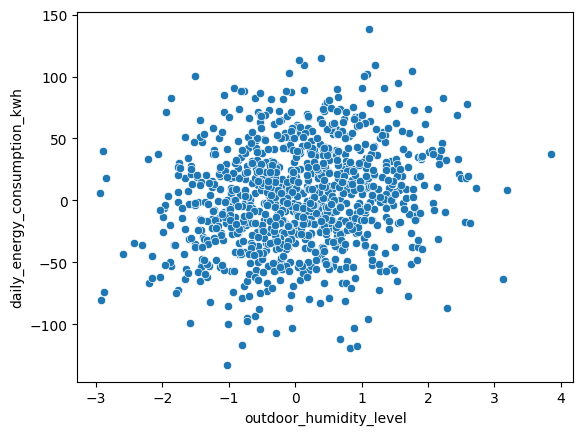

In [29]:
sns.scatterplot(x=df_reg["outdoor_humidity_level"] , y=df_reg["daily_energy_consumption_kwh"])
plt.show()

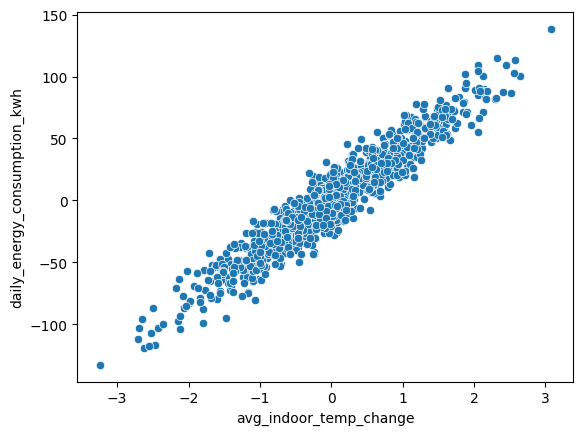

In [30]:
sns.scatterplot(x=df_reg["avg_indoor_temp_change"] , y=df_reg["daily_energy_consumption_kwh"])
plt.show()

In [31]:
df_reg.corr()

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
avg_indoor_temp_change,1.000000,0.002584,0.956682
outdoor_humidity_level,0.002584,1.000000,0.169557
daily_energy_consumption_kwh,0.956682,0.169557,1.000000


In [32]:
X = df_reg.drop("daily_energy_consumption_kwh", axis=1)
y = df_reg["daily_energy_consumption_kwh"]

In [33]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
regressor = KNeighborsRegressor(n_neighbors=5,algorithm='auto',weights='uniform')

In [37]:
regressor.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [38]:
y_pred = regressor.predict(X_test_scaled)

In [39]:
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error

In [40]:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.9148116801724379
137.98585795184556
9.223217425550478


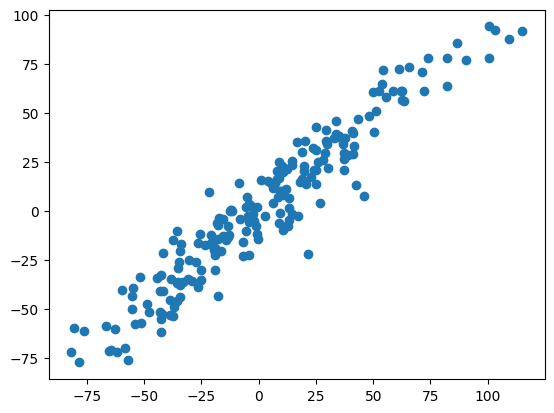

In [41]:
plt.scatter(y_test, y_pred)
plt.show()

0.9150757922058468
137.55805604661833
9.13810164669911


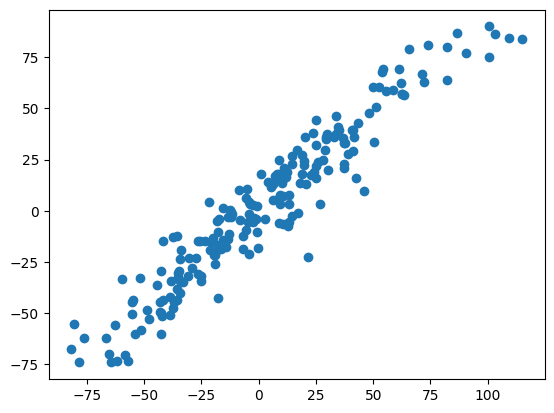

In [42]:
regressor = KNeighborsRegressor(n_neighbors=7,algorithm='auto',weights='uniform')
regressor.fit(X_train_scaled, y_train)
y_pred = regressor.predict(X_test_scaled)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.show()

0.9124305569144242
141.8427404013549
9.069950651250087


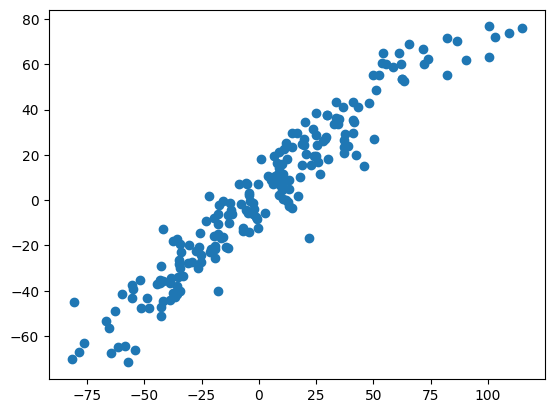

In [43]:
regressor = KNeighborsRegressor(n_neighbors=37,algorithm='auto',weights='uniform')
regressor.fit(X_train_scaled, y_train)
y_pred = regressor.predict(X_test_scaled)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.show()